In [101]:
import cv2
import numpy as np
import pytesseract as ocr
import matplotlib.pyplot as plt

In [102]:
img = cv2.imread("img/bitmap.pbm",0)
img = img/255
img = 1-img

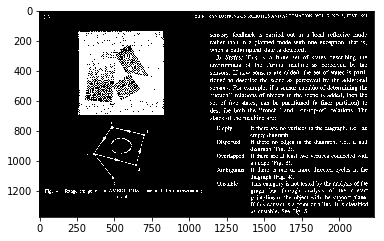

In [103]:
fig = plt.figure()
plt.imshow(img,cmap="gray")
plt.show()

In [104]:
kernel1 = np.ones((1, 100), np.uint8)
kernel2 = np.ones((200, 1), np.uint8)
kernel3 = np.ones((1, 30), np.uint8)

In [105]:
dilate1 = cv2.dilate(img, kernel1)
erode1 = cv2.erode(dilate1, kernel1)

In [106]:
dilate2 = cv2.dilate(img, kernel2)
erode2 = cv2.erode(dilate2, kernel2)

In [107]:
intersection = cv2.bitwise_and(erode1, erode2)

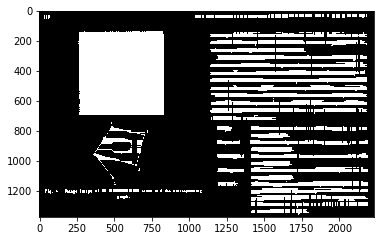

In [108]:
fig = plt.figure()
plt.imshow(intersection,cmap="gray")
plt.show()

In [109]:
closing = closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel3)

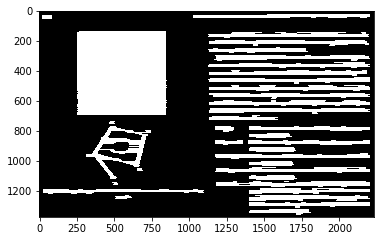

In [110]:
fig = plt.figure()
plt.imshow(closing,cmap="gray")
plt.show()

In [111]:
closing = closing.astype(np.uint8)

ret, labels = cv2.connectedComponents(closing,connectivity=4)

In [112]:
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

print(ret)

44


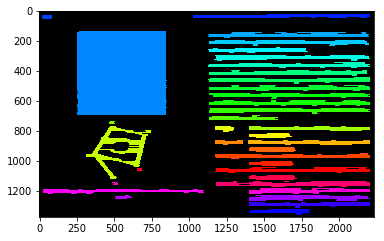

In [113]:
fig = plt.figure()
plt.imshow(labeled_img)
plt.show()

In [114]:
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

In [115]:
cnts, hierarchy= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
boxes = [cv2.boundingRect(contour) for contour in cnts]

31


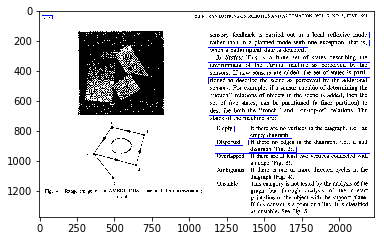

In [116]:
img3 = np.zeros((img.shape[0],img.shape[1],3),np.uint8)

img3[:,:,0] = img
img3[:,:,1] = img
img3[:,:,2] = img

area = np.array([None for i in range(len(boxes))])

comps = (1-img3)*255
c = 0
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    p = 0
    b = 0
    change_v = 0
    change_h = 0
    tmp = img[x:x+w,y:y+h]
    for j in range(x,x+w):
        for k in range(y,y+h):
            if(1-img[j][k]) == 0:
                p += 1
            if(j < img.shape[0]):
                change_v += abs(img[j][k]-img[j+1][k])
            if(k < img.shape[1]):
                change_h += abs(img[j][k]-img[j][k+1])
    
    
    if(p/(h*w) > 0.15 and p/(h*w) < .7):
        if(p > 0 and (change_v+change_h)/p < .9):
            cv2.rectangle(comps,(y,x),(y+h,x+w),(0,0,255))
            c+=1
print(c)
fig = plt.figure()
plt.imshow(comps,cmap="gray")
plt.show()

In [117]:
kernel4 = np.ones((1, 40), np.uint8)
kernel5 = np.ones((60, 1), np.uint8)
kernel6 = np.ones((1, 10), np.uint8)
kernel7 = np.ones((8, 1), np.uint8)

In [130]:
dilate3 = cv2.dilate(img, kernel4)
erode3 = cv2.erode(dilate3, kernel4)

# Passos (3)-(4): dilatação seguida de erosão com elemento 1x200
dilate4 = cv2.dilate(img, kernel5)
erode4 = cv2.erode(dilate4, kernel5)

# Passo (5): Interseção entre (2) e (4)
intersection2 = cv2.bitwise_and(erode3, erode4)

# Passo (6): Fechamento com elemento 1x30
closing2 = cv2.morphologyEx(intersection2, cv2.MORPH_CLOSE, kernel6)

# Passos Extras: utilizados para a separação dos componentes conexos diretamente em palavras
closing2 = cv2.dilate(closing2, kernel7)

In [131]:
closing2 = closing2.astype(np.uint8)
ret, labels = cv2.connectedComponents(closing2,connectivity=4)
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img2 = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img2 = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img2[label_hue==0] = 0

for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

cnts, hierarchy= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
boxes = [cv2.boundingRect(contour) for contour in cnts]

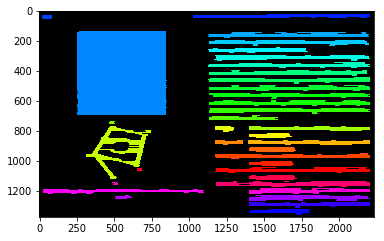

In [132]:
fig = plt.figure()
plt.imshow(labeled_img)
plt.show()

242


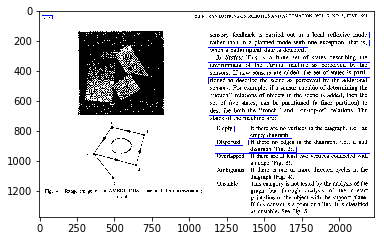

In [141]:
area = np.array([None for i in range(len(boxes))])

comps2 = (1-img3)*255
c = 0

pad = 3
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    p = 0
    b = 0
    change_v = 0
    change_h = 0
    tmp = img[x:x+w,y:y+h]
    for j in range(x,x+w):
        for k in range(y,y+h):
            if(1-img[j][k]) == 0:
                p += 1
            if(j < img.shape[0]):
                change_v += abs(img[j][k]-img[j+1][k])
            if(k < img.shape[1]):
                change_h += abs(img[j][k]-img[j][k+1])
    
    
    if(p/(h*w) > 0.1 and p/(h*w) < .7):
        if(p > 0 and (change_v+change_h)/p < .9):
            cv2.rectangle(comps2,(y-pad,x-pad),(y+h+pad,x+w+pad),(0,0,255))
            c+=1
print(c)
fig = plt.figure()
plt.imshow(comps,cmap="gray")
plt.show()

In [142]:
cv2.imwrite("dilate1.pbm",1-dilate1)
cv2.imwrite("erode1.pbm",1-erode1)
cv2.imwrite("dilate2.pbm",1-dilate2)
cv2.imwrite("erode2.pbm",1-erode2)
cv2.imwrite("intersection.pbm",1-intersection)
cv2.imwrite("closing.pbm",1-closing)
cv2.imwrite("comps.png",comps)
cv2.imwrite("words.png",comps2)
cv2.imwrite("labeled.png",labeled_img)

True

In [76]:
#for i in range(len(boxes)):
#    y,x,h,w = boxes[i]
#    tmp = img[x:x+w,y:y+h]
#    phrase = ocr.image_to_string(tmp, lang='eng')
#    cv2.imwrite("results/tmp/%d.png" % i,(1-tmp)*255)
#    print(phrase)